In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
card_01 = pd.read_csv("card_202001.csv")
card_02 = pd.read_csv("card_202002.csv")
card_03 = pd.read_csv("card_202003.csv")
card_04 = pd.read_csv("card_202004.csv")
card_05 = pd.read_csv("card_202005.csv")
card_06 = pd.read_csv("card_202006.csv")

card_01.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230.0
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550.0
2,20200104,1174066000,성내3동,7021,한의원,53,4589800.0
3,20200104,1174066000,성내3동,7020,의원,339,9267240.0
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000.0


### 데이터 가공

In [10]:
adstrd_code_06 = card_06['adstrd_code']
mrhst_induty_cl_code_06 = card_06['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_06:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_06:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card06 = {"receipt_dttm" : card_06['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_06['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_06['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_06['selng_cascnt'], "salamt" : card_06['salamt']}

df_card06 = pd.DataFrame(data_card06)

df_card06.to_csv("df_card06.csv", encoding = 'utf-8-sig')

### 지역코드 다섯자리, 업종코드 두 자리로 csv 파일 변환 완료
<br>
csv 파일 매번 불러와서 가공하기 귀찮아서.. 아예 가공한 DataFrame을 csv 파일로 변환해놓은 후, 이후부터는 이 csv 파일을 사용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
adstrd=pd.read_csv('adstrd_master.csv')
adstrd['adstrd_code']=adstrd['adstrd_code'].astype(str)
adstrd['exp']=adstrd['adstrd_code'].apply(lambda x:x[:5])
adstrd['total_adstrd']=adstrd['brtc_nm']+' '+adstrd['signgu_nm']

adstrd_name=adstrd[['exp','total_adstrd']]
adstrd_name=adstrd_name.drop_duplicates(['exp'],keep='first')
adstrd_name=adstrd_name.reset_index()
adstrd_name=adstrd_name.drop(['index'],axis=1)
adstrd_name_seoul = adstrd_name[0:25]
adstrd_name_seoul

,exp,total_adstrd
0,11110,서울특별시 종로구
1,11140,서울특별시 중구
2,11170,서울특별시 용산구
3,11200,서울특별시 성동구
4,11215,서울특별시 광진구
5,11230,서울특별시 동대문구
6,11260,서울특별시 중랑구
7,11290,서울특별시 성북구
8,11305,서울특별시 강북구
9,11320,서울특별시 도봉구


In [3]:
card_01 = pd.read_csv("df_card01.csv")
card_02 = pd.read_csv("df_card02.csv")
card_03 = pd.read_csv("df_card03.csv")
card_04 = pd.read_csv("df_card04.csv")
card_05 = pd.read_csv("df_card05.csv")
card_06 = pd.read_csv("df_card06.csv")

card_01.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200104,11740,성내3동,70,약국,463,5843230.0
1,1,20200104,11740,성내3동,70,치과의원,33,7835550.0
2,2,20200104,11740,성내3동,70,한의원,53,4589800.0
3,3,20200104,11740,성내3동,70,의원,339,9267240.0
4,4,20200104,11740,성내3동,61,자동차정비,19,4441000.0


In [4]:
card_01['mrhst_induty_cl_code'].value_counts()
code = []
for i in card_01['mrhst_induty_cl_code'].value_counts().index:
    code.append(i)
print(code , '\n')
print(len(code), "\n")
code.sort()
print(code)

[80, 70, 83, 71, 40, 21, 51, 61, 42, 44, 91, 50, 22, 93, 92, 90, 99, 20, 10, 52, 33, 31, 82, 84, 34, 81, 43, 32, 30, 11, 60, 41, 62, 96, 95] 

35 

[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


In [5]:
total_sum = []
seoul01_sum = []
seoul02_sum = []
seoul03_sum = []
seoul04_sum = []
seoul05_sum = []
seoul06_sum = []

In [6]:
is_code = card_01['adstrd_code'] == 11110
for i in code:
    is_name = card_01['mrhst_induty_cl_code'] == i
    seoul = card_01[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul01_sum.append(sum_num)
total_sum.append(seoul01_sum)
print(total_sum[0])

[14543, 6965, 5147, 61849, 15203, 39, 3988, 178, 3042, 1285, 625096, 5079, 19284, 2756, 21386, 274046, 2971, 1412, 85, 38629, 861185, 251856, 25082, 1477633, 5534, 3032, 114966, 1130, 1155, 33556, 1132, 3011, 0, 64, 21373]


In [7]:
is_code = card_02['adstrd_code'] == 11110
for i in code:
    is_name = card_02['mrhst_induty_cl_code'] == i
    seoul = card_02[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum.append(sum_num)
total_sum.append(seoul02_sum)
print(total_sum[1])

[11064, 1713, 4113, 53185, 14490, 67, 3611, 414, 6795, 1178, 510462, 10444, 10669, 2221, 14211, 155872, 4760, 2161, 214, 30047, 1010614, 190869, 21194, 987353, 3567, 2248, 89840, 1627, 1939, 48498, 2027, 2825, 0, 341, 71410]


In [8]:
is_code = card_03['adstrd_code'] == 11110
for i in code:
    is_name = card_03['mrhst_induty_cl_code'] == i
    seoul = card_03[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul03_sum.append(sum_num)
total_sum.append(seoul03_sum)
print(total_sum[2])

[10367, 294, 5676, 47725, 11550, 68, 5892, 548, 9228, 1370, 661950, 13494, 13981, 3273, 15860, 192383, 4205, 1202, 360, 40679, 1080440, 277693, 26499, 1209726, 3331, 2470, 118727, 2517, 2749, 56696, 3205, 2344, 0, 1076, 73219]


In [9]:
is_code = card_04['adstrd_code'] == 11110
for i in code:
    is_name = card_04['mrhst_induty_cl_code'] == i
    seoul = card_04[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul04_sum.append(sum_num)
total_sum.append(seoul04_sum)
print(total_sum[3])

[10973, 378, 7523, 45713, 12647, 108, 6938, 694, 9023, 1666, 680754, 14151, 18015, 4534, 18531, 203937, 4750, 1630, 379, 46228, 1137282, 308079, 27700, 1310614, 1847, 1363, 128294, 2298, 2882, 54011, 3354, 3142, 0, 1224, 74573]


In [10]:
is_code = card_05['adstrd_code'] == 11110
for i in code:
    is_name = card_05['mrhst_induty_cl_code'] == i
    seoul = card_05[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul05_sum.append(sum_num)
total_sum.append(seoul05_sum)
print(total_sum[4])

[39319, 5110, 90760, 172382, 162036, 3456, 30650, 7032, 7708, 21556, 273580, 9009, 92187, 30660, 114374, 130616, 97072, 22804, 12080, 334186, 354551, 523412, 290219, 1123330, 16511, 14348, 228329, 122459, 400803, 66147, 41099, 69918, 0, 5489, 58726]


In [11]:
is_code = card_06['adstrd_code'] == 11110
for i in code:
    is_name = card_06['mrhst_induty_cl_code'] == i
    seoul = card_06[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul06_sum.append(sum_num)
total_sum.append(seoul06_sum)
print(total_sum[5])

[7014, 548, 5015, 21054, 7204, 89, 4134, 498, 4929, 792, 367525, 7431, 13375, 2948, 11818, 98293, 1804, 976, 197, 23369, 131072, 141244, 14225, 691930, 46, 1197, 65389, 1261, 1563, 26352, 1610, 1757, 0, 585, 12507]


In [12]:
print(code, '\n')

for i in total_sum:
    print(i)
    print('\n')
print(len(total_sum))

[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99] 

[14543, 6965, 5147, 61849, 15203, 39, 3988, 178, 3042, 1285, 625096, 5079, 19284, 2756, 21386, 274046, 2971, 1412, 85, 38629, 861185, 251856, 25082, 1477633, 5534, 3032, 114966, 1130, 1155, 33556, 1132, 3011, 0, 64, 21373]


[11064, 1713, 4113, 53185, 14490, 67, 3611, 414, 6795, 1178, 510462, 10444, 10669, 2221, 14211, 155872, 4760, 2161, 214, 30047, 1010614, 190869, 21194, 987353, 3567, 2248, 89840, 1627, 1939, 48498, 2027, 2825, 0, 341, 71410]


[10367, 294, 5676, 47725, 11550, 68, 5892, 548, 9228, 1370, 661950, 13494, 13981, 3273, 15860, 192383, 4205, 1202, 360, 40679, 1080440, 277693, 26499, 1209726, 3331, 2470, 118727, 2517, 2749, 56696, 3205, 2344, 0, 1076, 73219]


[10973, 378, 7523, 45713, 12647, 108, 6938, 694, 9023, 1666, 680754, 14151, 18015, 4534, 18531, 203937, 4750, 1630, 379, 46228, 1137282, 308079, 27700, 1310614, 1847, 1363, 128

In [13]:
month_total = []
for i in range(0, len(code)):
    sum_code = 0
    for j in range(0, len(total_sum)):
        sum_code = sum_code + total_sum[j][i]
    month_total.append(sum_code)
    
month_total

[93280,
 15008,
 118234,
 401908,
 223130,
 3827,
 55213,
 9364,
 40725,
 27847,
 3119367,
 59608,
 167511,
 46392,
 196180,
 1055147,
 115562,
 30185,
 13315,
 513138,
 4575144,
 1693153,
 404919,
 6800586,
 30836,
 24658,
 745545,
 131292,
 411091,
 285260,
 52427,
 82997,
 0,
 8779,
 311808]

In [14]:
mean_total = []
month_day = [28, 21, 31, 30, 31, 14]
month = sum(month_day)

for i in month_total:
    mean_total.append(i/month)
mean_total

[601.8064516129032,
 96.8258064516129,
 762.8,
 2592.9548387096775,
 1439.5483870967741,
 24.690322580645162,
 356.21290322580643,
 60.41290322580645,
 262.741935483871,
 179.65806451612903,
 20124.948387096774,
 384.56774193548387,
 1080.716129032258,
 299.3032258064516,
 1265.6774193548388,
 6807.4,
 745.5612903225806,
 194.74193548387098,
 85.90322580645162,
 3310.567741935484,
 29517.058064516128,
 10923.567741935483,
 2612.3806451612904,
 43874.74838709678,
 198.94193548387096,
 159.08387096774194,
 4809.967741935484,
 847.0451612903225,
 2652.2,
 1840.3870967741937,
 338.23870967741937,
 535.4645161290323,
 0.0,
 56.63870967741936,
 2011.6645161290323]

### 2월 상반기 상대값 계산

In [15]:
is_date = card_02['receipt_dttm'] < 20200215
df_card02_1 = card_02[is_date]
df_card02_1.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200201,11680,논현2동,40,대형할인점,67,1007350.0
1,1,20200201,11410,북가좌2동,71,사우나,7,49000.0
2,2,20200201,11260,면목3.8동,44,기타잡화,11,79400.0
3,3,20200201,11320,창5동,52,컴 퓨 터,1,15000.0
4,4,20200201,11470,신월6동,90,기타건축자재,3,24500.0


In [18]:
seoul02_sum_1 = []

is_code = df_card02_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card02_1['mrhst_induty_cl_code'] == i
    seoul = df_card02_1[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum_1.append(sum_num)
    
print(seoul02_sum_1)
print(code)

mean02_1 = []

for i in seoul02_sum_1:
    mean02_1.append(i/6)

Jongrogu02_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_1, 'mean' : mean02_1})
Jongrogu02_1

[3431, 593, 1336, 17115, 4823, 29, 1028, 125, 1962, 358, 137824, 3004, 3322, 678, 4382, 49299, 1321, 684, 59, 8875, 44048, 57306, 6512, 300898, 1153, 722, 26415, 493, 537, 13414, 610, 1089, 0, 80, 6204]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,3431,571.833333
1,11,593,98.833333
2,20,1336,222.666667
3,21,17115,2852.500000
4,22,4823,803.833333
5,30,29,4.833333
6,31,1028,171.333333
7,32,125,20.833333
8,33,1962,327.000000
9,34,358,59.666667


In [19]:
per_02_1 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu02_1['mean'][i]
    if(a != 0):
        per_02_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02_1.append(0)
per_02_1

[-4.980524585477402,
 2.073338663823731,
 -70.80929907358853,
 10.00962906933925,
 -44.16072842438638,
 -80.4241790784775,
 -51.901424181503145,
 -65.51509326498646,
 24.45672191528545,
 -66.78876240408901,
 14.140251318082594,
 30.189460027736775,
 -48.768538583535815,
 -62.24564580100017,
 -42.29704013321099,
 20.699532861298007,
 -70.46967572962276,
 -41.46099055822429,
 -88.55301038928528,
 -55.319848981495554,
 -75.12850597343676,
 -12.565196411665097,
 -58.454242288786986,
 14.301890062611259,
 -3.4056514031218947,
 -24.358558412415178,
 -8.471319638653602,
 -90.29961206064854,
 -96.62544302842923,
 21.478066792867313,
 -69.94233251314526,
 -66.10419653722424,
 0,
 -76.45897406690207,
 -48.59977935139573]

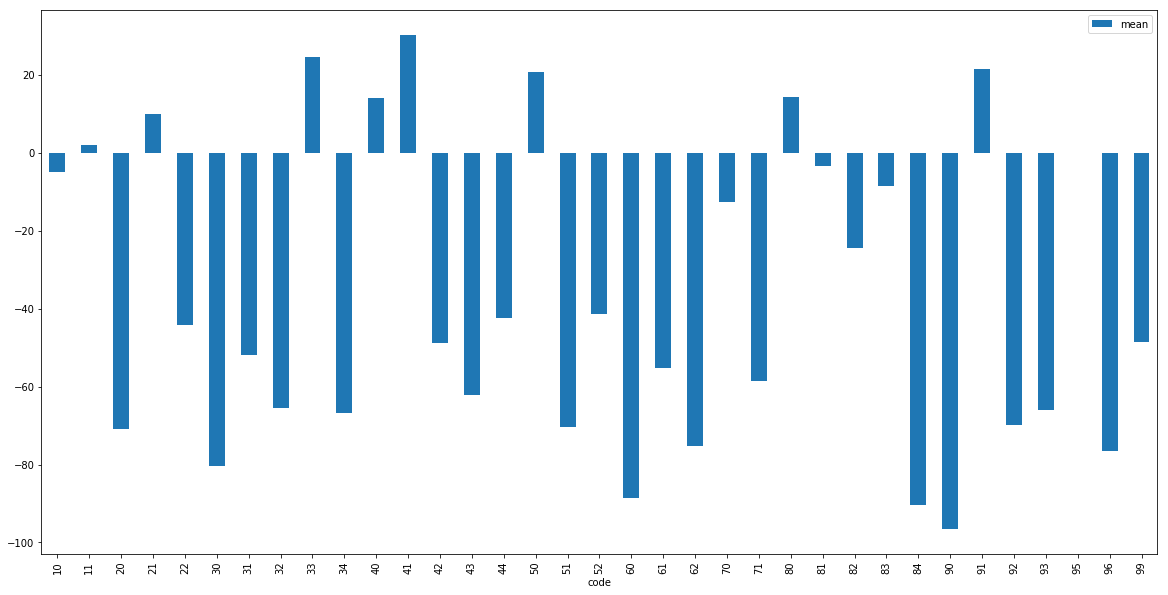

In [20]:
plt.rcParams['figure.figsize'] = [20, 10]
data_02_1 = pd.DataFrame({"code": code, "mean": per_02_1})
data_02_1.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 2월 하반기 상대값 계산

In [21]:
is_date = card_02['receipt_dttm'] >= 20200215
df_card02_2 = card_02[is_date]
df_card02_2.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
160531,160531,20200215,11710,거여1동,70,동물병원,13,730100.0
160532,160532,20200215,11680,대치4동,70,약국,442,7531530.0
160533,160533,20200215,11650,서초1동,80,서양음식,1840,19929464.0
160534,160534,20200215,11440,대흥동,71,미 용 원,59,2890700.0
160535,160535,20200215,11260,망우본동,70,약국,394,6041060.0


In [22]:
seoul02_sum_2 = []

is_code = df_card02_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card02_2['mrhst_induty_cl_code'] == i
    seoul = df_card02_2[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum_2.append(sum_num)
    
print(seoul02_sum_2)
print(code)

mean02_2 = []

for i in seoul02_sum_2:
    mean02_2.append(i/15)

Jongrogu02_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_2, 'mean' : mean02_2})
Jongrogu02_2

[7633, 1120, 2777, 36070, 9667, 38, 2583, 289, 4833, 820, 372638, 7440, 7347, 1543, 9829, 106573, 3439, 1477, 155, 21172, 966566, 133563, 14682, 686455, 2414, 1526, 63425, 1134, 1402, 35084, 1417, 1736, 0, 261, 65206]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,7633,508.866667
1,11,1120,74.666667
2,20,2777,185.133333
3,21,36070,2404.666667
4,22,9667,644.466667
5,30,38,2.533333
6,31,2583,172.200000
7,32,289,19.266667
8,33,4833,322.200000
9,34,820,54.666667


In [23]:
per_02_2 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu02_2['mean'][i]
    if(a != 0):
        per_02_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02_2.append(0)
per_02_2

[-15.443467695826177,
 -22.885572139303477,
 -75.72976752316029,
 -7.261529172513784,
 -55.23133001688104,
 -89.73956972389165,
 -51.65812399253799,
 -68.10835825145949,
 22.62983425414364,
 -69.57182700709832,
 23.441476000312452,
 28.975976379009534,
 -54.67820023759634,
 -65.63128700350636,
 -48.22798790226663,
 4.369754482866692,
 -69.2491187991439,
 -49.43735851140191,
 -87.9709600700964,
 -57.36481544275939,
 118.30676076352276,
 -18.486338801041597,
 -62.532259538327416,
 4.305251537637087,
 -19.10537467029878,
 -36.05050423121637,
 -12.092272543351962,
 -91.07485604606525,
 -96.47588165799462,
 27.089205169552923,
 -72.07100666959137,
 -78.3863673787406,
 0,
 -69.27896115730722,
 116.09302305692391]

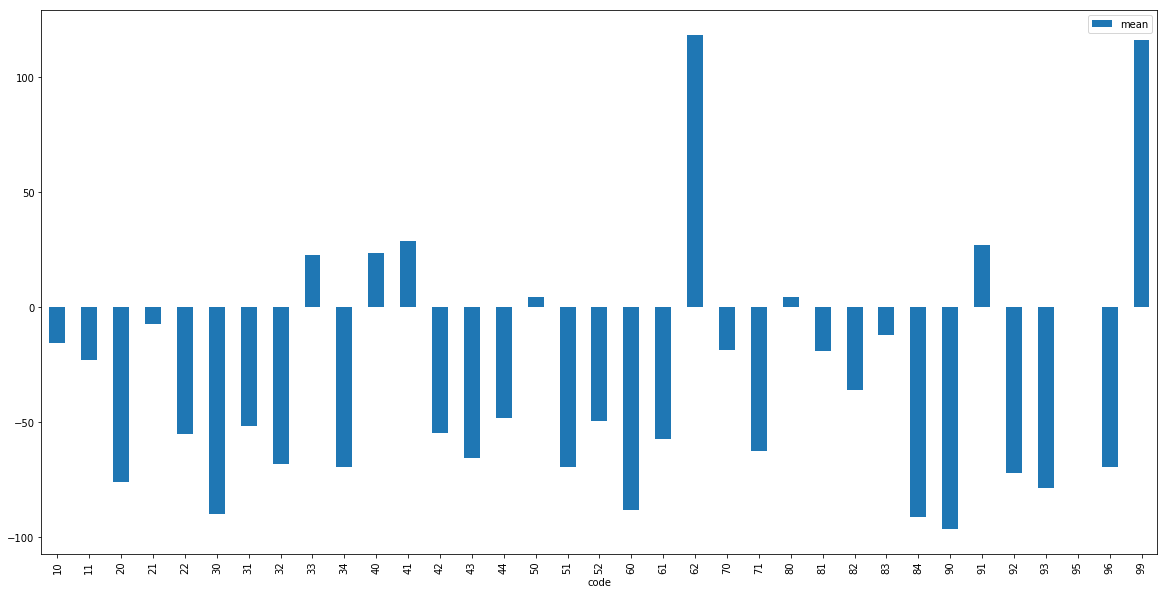

In [24]:
data_02_2 = pd.DataFrame({"code": code, "mean": per_02_2})
data_02_2.plot(x = "code", y = "mean", kind = 'bar')

### 2월 전체 상대값 계산

In [25]:
seoul02_sum = []

is_code = card_02['adstrd_code'] == 11110

for i in code:
    is_name = card_02['mrhst_induty_cl_code'] == i
    seoul = card_02[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum.append(sum_num)
    
print(seoul02_sum)
print(code)

mean02 = []

for i in seoul02_sum:
    mean02.append(i/21)

Jongrogu02 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum, 'mean' : mean02})
Jongrogu02

[11064, 1713, 4113, 53185, 14490, 67, 3611, 414, 6795, 1178, 510462, 10444, 10669, 2221, 14211, 155872, 4760, 2161, 214, 30047, 1010614, 190869, 21194, 987353, 3567, 2248, 89840, 1627, 1939, 48498, 2027, 2825, 0, 341, 71410]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,11064,526.857143
1,11,1713,81.571429
2,20,4113,195.857143
3,21,53185,2532.619048
4,22,14490,690.000000
5,30,67,3.190476
6,31,3611,171.952381
7,32,414,19.714286
8,33,6795,323.571429
9,34,1178,56.095238


In [26]:
per_02 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu02['mean'][i]
    if(a != 0):
        per_02.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02.append(0)
per_02

[-12.454055378583668,
 -15.754454766981423,
 -74.32391939471121,
 -2.3269125319843376,
 -52.068300990454,
 -87.0780295394876,
 -51.72763833224231,
 -67.36742539818148,
 23.15180215732701,
 -68.77666569195279,
 20.783983233961067,
 29.322685992931596,
 -52.98972547929333,
 -64.66396094564745,
 -46.53343139682217,
 9.035405448132785,
 -69.5978493507093,
 -47.15839623906545,
 -88.13726016129321,
 -56.78053931096972,
 63.03954169582007,
 -16.794583832648318,
 -61.36711175274444,
 7.161433973344004,
 -14.619739451105382,
 -32.70994828298746,
 -11.057714570580988,
 -90.85335776451761,
 -96.51861347811878,
 25.486022776214178,
 -71.4628140534639,
 -74.87717570973592,
 0,
 -71.33039341719144,
 69.03793665454685]

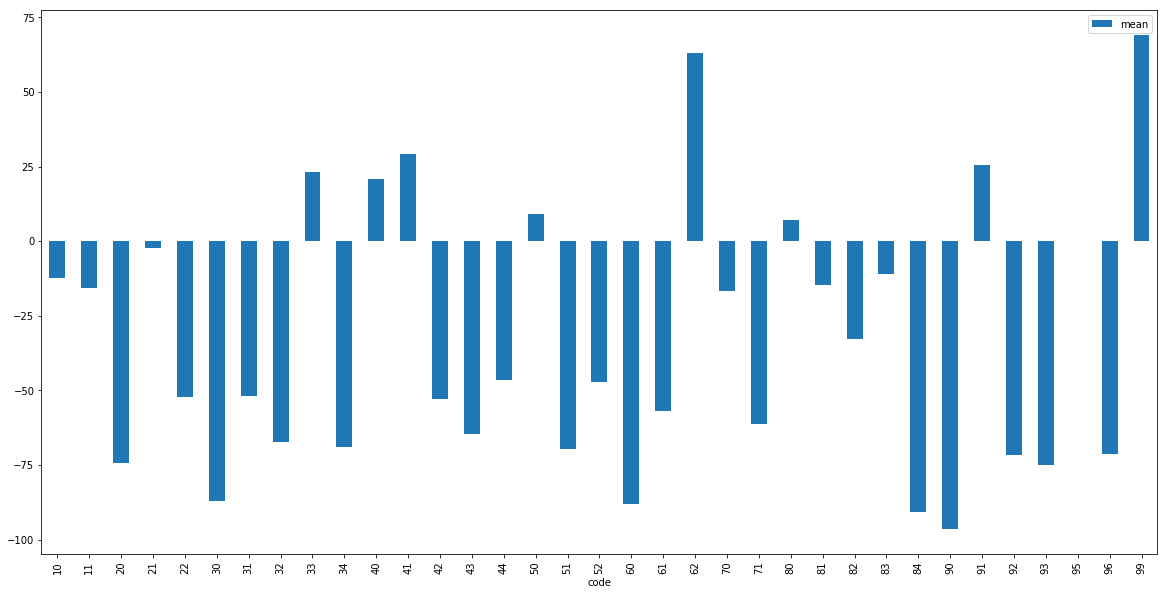

In [27]:
data_02 = pd.DataFrame({"code": code, "mean": per_02})
data_02.plot(x = "code", y = "mean", kind = 'bar')

### 날짜 별로 구분

In [28]:
count = card_02['receipt_dttm'].value_counts().index
date02 = []
for i in count:
    date02.append(i)
date02.sort()
date02

[20200201,
 20200202,
 20200203,
 20200205,
 20200206,
 20200214,
 20200215,
 20200216,
 20200217,
 20200218,
 20200219,
 20200220,
 20200221,
 20200222,
 20200223,
 20200224,
 20200225,
 20200226,
 20200227,
 20200228,
 20200229]

In [29]:
data_day = []
is_code = card_02['adstrd_code'] == 11110
num = 0

for i in date02:
    sum_day = []
    is_date = card_02['receipt_dttm'] == i
    for j in code:
        is_name = card_02['mrhst_induty_cl_code'] == j
        seoul = card_02[is_code & is_date & is_name]
        seoul = seoul.astype({'selng_cascnt' : int})
        sum_num = sum(seoul['selng_cascnt'])
        sum_day.append(sum_num)
    data_day.append(sum_day)
    print(data_day[num], " ", i, "\n")
    num = num+1

[737, 30, 256, 3292, 667, 4, 204, 32, 356, 77, 27822, 591, 614, 128, 752, 8092, 306, 114, 11, 1678, 16969, 13363, 1304, 55941, 235, 124, 5031, 91, 107, 4105, 117, 226, 0, 11, 941]   20200201 

[512, 34, 304, 2756, 883, 8, 138, 20, 277, 55, 15916, 303, 781, 129, 931, 8626, 170, 152, 10, 1150, 7866, 7039, 1214, 38471, 279, 173, 4031, 90, 70, 2370, 130, 118, 0, 20, 882]   20200202 

[511, 166, 145, 2263, 791, 7, 50, 5, 212, 30, 12314, 281, 468, 57, 640, 9452, 94, 97, 0, 832, 2227, 1534, 788, 38324, 191, 141, 2805, 99, 27, 190, 6, 35, 0, 7, 1196]   20200203 

[675, 86, 192, 2112, 957, 2, 244, 22, 327, 76, 28179, 634, 402, 114, 643, 7698, 352, 119, 11, 1663, 6724, 12656, 967, 53955, 128, 87, 4622, 76, 101, 1891, 114, 327, 0, 10, 1121]   20200205 

[442, 155, 185, 4356, 677, 7, 194, 19, 388, 48, 25902, 575, 404, 115, 639, 7449, 192, 84, 12, 1718, 5642, 11509, 995, 53963, 124, 79, 4593, 48, 99, 1545, 112, 223, 0, 7, 996]   20200206 

[554, 122, 254, 2336, 848, 1, 198, 27, 402, 72, 27691, 620,

In [30]:
data_day02 = pd.DataFrame({"date" : date02, "day_sum" : data_day})
data_day02

,date,day_sum
0,20200201,"[737, 30, 256, 3292, 667, 4, 204, 32, 356, 77,..."
1,20200202,"[512, 34, 304, 2756, 883, 8, 138, 20, 277, 55,..."
2,20200203,"[511, 166, 145, 2263, 791, 7, 50, 5, 212, 30, ..."
3,20200205,"[675, 86, 192, 2112, 957, 2, 244, 22, 327, 76,..."
4,20200206,"[442, 155, 185, 4356, 677, 7, 194, 19, 388, 48..."
5,20200214,"[554, 122, 254, 2336, 848, 1, 198, 27, 402, 72..."
6,20200215,"[628, 100, 261, 3014, 880, 2, 175, 32, 409, 65..."
7,20200216,"[654, 70, 354, 3494, 815, 5, 150, 24, 283, 63,..."
8,20200217,"[418, 115, 146, 2532, 703, 0, 81, 12, 183, 32,..."
9,20200218,"[568, 106, 157, 2352, 582, 0, 236, 14, 309, 60..."


In [31]:
per= []
for i in range(0, len(data_day)):
    per_day = []
    for j in range(0, len(mean_total)):
        a = mean_total[j]
        b = data_day02['day_sum'][i][j]
        if(a != 0):
            per_day.append( ( ( b - a ) / a ) * 100 )
        else:
            per_day.append(0)
    per.append(per_day)

In [32]:
per[0]

[22.464622641509443,
 -69.01652452025586,
 -66.4394336654431,
 26.959403644615183,
 -53.6660242907722,
 -83.79932061667103,
 -42.73087859743176,
 -47.03118325501922,
 35.49416820135052,
 -57.14080511365677,
 38.24631728167927,
 53.67903637095692,
 -43.18582063267487,
 -57.23400586307984,
 -40.585176878377005,
 18.870640773276147,
 -58.95709662345754,
 -41.46099055822429,
 -87.19489297784455,
 -49.31382980796589,
 -42.511208390380716,
 22.331827070560077,
 -50.08384392927968,
 27.50158589274512,
 18.124918925930732,
 -22.053694541325335,
 4.595296058588012,
 -89.25677116656003,
 -95.96561345298244,
 123.05090093248263,
 -65.40904495775078,
 -57.793655192356354,
 0,
 -80.57865360519422,
 -53.222816605090316]

### 잘못그린 그래프...

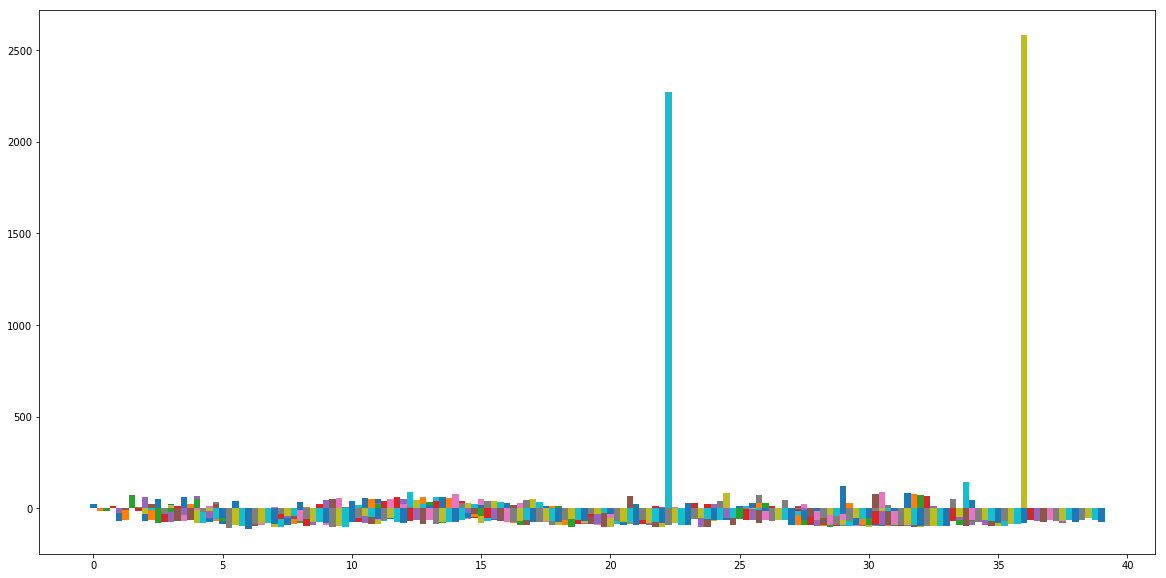

<Figure size 72000x36000 with 0 Axes>

In [33]:
a = np.array(per)
x = np.arange(len(per[0]))
for i in range(0, len(per)):
    plt.bar(x + 0.25*i, a[i], width = 0.25)
plt.figure(figsize = (1000, 500))
plt.show()

In [34]:
df_per = pd.DataFrame(per, index = date02)
df_per
# 2월 데이터가 불안정! 2월 4일, 2월 7~13일 데이터가 존재하지 않는다..

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
20200201,22.464623,-69.016525,-66.439434,26.959404,-53.666024,-83.799321,-42.730879,-47.031183,35.494168,-57.140805,...,-22.053695,4.595296,-89.256771,-95.965613,123.050901,-65.409045,-57.793655,0,-80.578654,-53.222817
20200202,-14.922813,-64.885394,-60.146827,6.288006,-38.661319,-67.598641,-61.259124,-66.894490,5.426642,-69.386289,...,8.747668,-16.194864,-89.374829,-97.360682,28.777256,-61.565606,-77.963059,0,-64.688461,-56.155711
20200203,-15.088979,71.441898,-80.991085,-12.725052,-45.052212,-71.648811,-85.963451,-91.723622,-19.312462,-83.301612,...,-11.367508,-41.683601,-88.312311,-98.981977,-89.676085,-98.226105,-93.463619,0,-87.640961,-40.546747
20200205,12.162307,-11.180704,-74.829575,-18.548524,-33.520817,-91.899660,-31.501639,-63.583938,24.456722,-57.697418,...,-45.311866,-3.907879,-91.027633,-96.191841,2.750123,-66.295993,-38.931528,0,-82.344231,-44.275003
20200206,-26.554460,60.081290,-75.747247,67.993670,-52.971362,-71.648811,-45.538188,-68.549765,47.673419,-73.282580,...,-50.340660,-4.510794,-94.333242,-96.267250,-16.050270,-66.887291,-58.353916,0,-87.640961,-50.488762
20200214,-7.943825,25.999467,-66.701626,-9.909731,-41.092637,-95.949830,-44.415265,-55.307561,53.001842,-59.923870,...,-25.825290,10.873924,-89.492886,-94.985295,80.016476,-61.269956,-70.119402,0,-55.860576,-46.909637
20200215,4.352487,3.278252,-65.783954,16.238045,-38.869717,-91.899660,-50.872077,-47.031183,55.666053,-63.820160,...,-20.796496,22.703526,-88.666484,-95.663977,91.698801,-68.661186,-72.920708,0,-55.860576,-57.746434
20200216,8.672813,-27.705224,-53.592029,34.749744,-43.385022,-79.749151,-57.890352,-60.273387,7.710252,-64.933386,...,46.463622,-14.864294,-89.138714,-97.586909,16.551567,-65.113396,-85.806716,0,-39.970384,-65.700046
20200217,-30.542453,18.769989,-80.859990,-2.350787,-51.165240,-100.000000,-77.260790,-80.136694,-30.349908,-82.188387,...,2.461676,-44.116049,-92.208208,-99.359023,-87.774311,-99.408702,-95.331157,0,-94.703269,2582.604359
20200218,-5.617496,9.474947,-79.417934,-9.292674,-59.570654,-100.000000,-33.747487,-76.826143,17.605893,-66.603225,...,-37.140076,-9.417272,-92.916552,-96.191841,-3.824581,-70.730730,-60.594961,0,-96.468846,-55.608900


In [35]:
str_day02 = []

for i in date02:
    str_day02.append(str(i))
str_day02

['20200201',
 '20200202',
 '20200203',
 '20200205',
 '20200206',
 '20200214',
 '20200215',
 '20200216',
 '20200217',
 '20200218',
 '20200219',
 '20200220',
 '20200221',
 '20200222',
 '20200223',
 '20200224',
 '20200225',
 '20200226',
 '20200227',
 '20200228',
 '20200229']

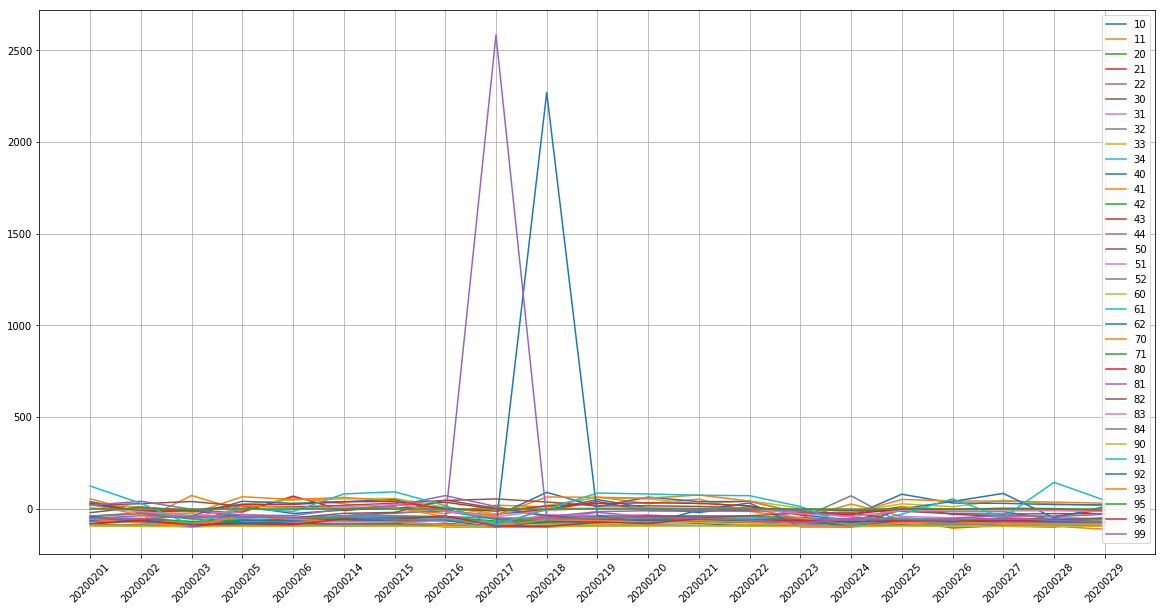

In [48]:
plt.rcParams['figure.figsize'] = [20, 10]
for i in range(0, len(code)):
    plt.plot(str_day02, df_per[i])
plt.legend(code)
plt.xticks(rotation=45)
plt.grid()
plt.show()

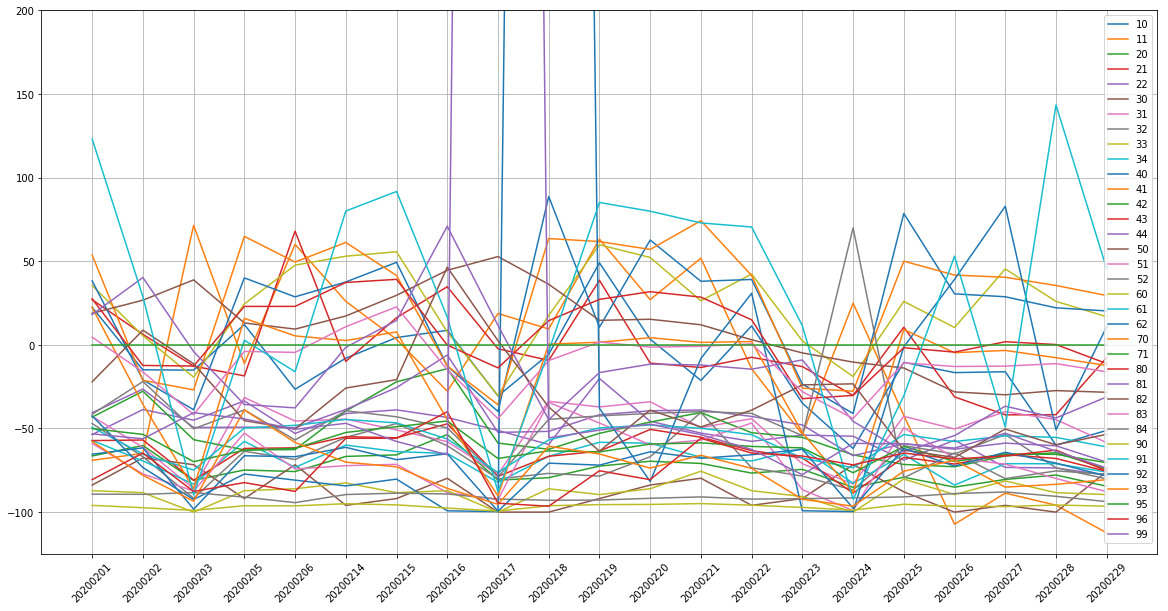

In [49]:
plt.rcParams['figure.figsize'] = [20, 10]
for i in range(0, len(code)):
    plt.plot(str_day02, df_per[i])
plt.ylim([-125, 200])
plt.legend(code)
plt.xticks(rotation=45)
plt.grid()
plt.show()

### 그래프 하나만 뽑아보기

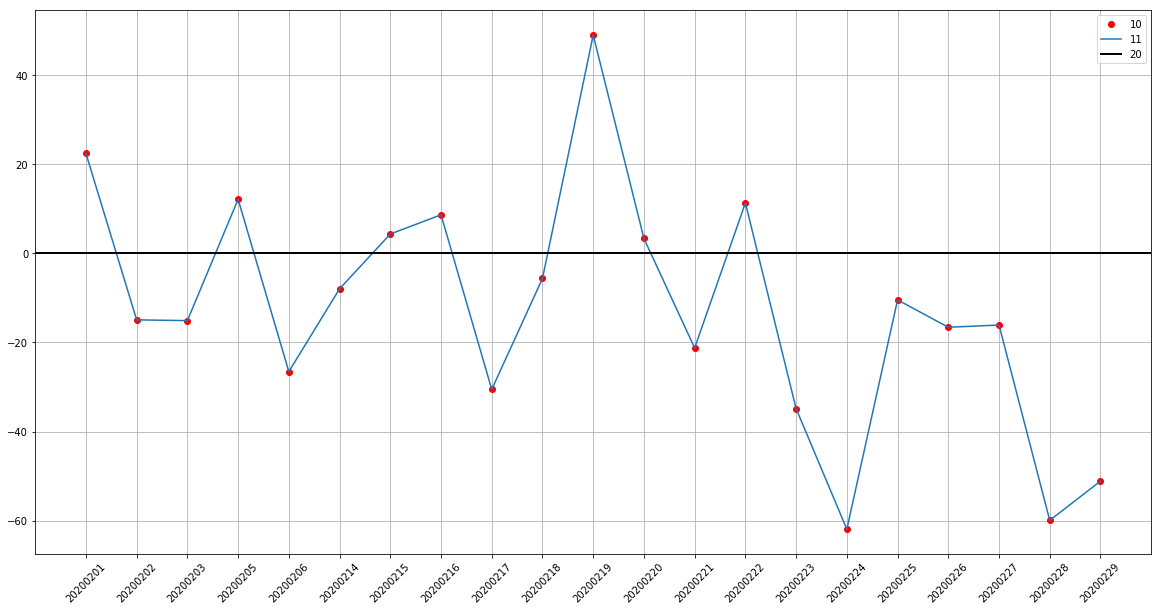

In [52]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(str_day02, df_per[0], 'ro', str_day02, df_per[0])
plt.axhline(y=0, color='k', linewidth=2)
plt.legend(code)
plt.xticks(rotation=45)
plt.grid()
plt.show()